In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the csv file in pandas data frame
df = pd.read_csv("D:\dowloads\kidney_disease (1).csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
#dropping uncessary column
df = df.drop('id', axis=1)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.columns =['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell','pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'wbc_count','rbc_count', 'hypertension','diabetes_mellitus', 'coronary_artery_disease', 'apetite', 'peda_edema', 'anaemia', 'class' ]

In [6]:
#checking first few rows
df.head()


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,wbc_count,rbc_count,hypertension,diabetes_mellitus,coronary_artery_disease,apetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
#converting data type of certain columns to required type
df[['specific_gravity','albumin', 'sugar' ]] = df[['specific_gravity','albumin', 'sugar' ]].astype('object')

In [8]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'],errors='coerce')
df['wbc_count'] = pd.to_numeric(df['wbc_count'],errors='coerce')
df['rbc_count'] = pd.to_numeric(df['rbc_count'],errors='coerce')

In [9]:
#creating seperate list of categorical and numerical column
cat_col = [col for col in df.columns if df[col].dtype=='object']
num_col = [col for col in df.columns if df[col].dtype!='object']

In [10]:
cat_col

['specific_gravity',
 'albumin',
 'sugar',
 'red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'apetite',
 'peda_edema',
 'anaemia',
 'class']

In [11]:
num_col

['age',
 'blood_pressure',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'wbc_count',
 'rbc_count']

In [12]:
for col in cat_col:
    print(f"{col} has{df[col].unique()}values\n")

specific_gravity has[1.02 1.01 1.005 1.015 nan 1.025]values

albumin has[1.0 4.0 2.0 3.0 0.0 nan 5.0]values

sugar has[0.0 3.0 4.0 1.0 nan 2.0 5.0]values

red_blood_cells has[nan 'normal' 'abnormal']values

pus_cell has['normal' 'abnormal' nan]values

pus_cell_clumps has['notpresent' 'present' nan]values

bacteria has['notpresent' 'present' nan]values

hypertension has['yes' 'no' nan]values

diabetes_mellitus has['yes' 'no' ' yes' '\tno' '\tyes' nan]values

coronary_artery_disease has['no' 'yes' '\tno' nan]values

apetite has['good' 'poor' nan]values

peda_edema has['no' 'yes' nan]values

anaemia has['no' 'yes' nan]values

class has['ckd' 'ckd\t' 'notckd']values



In [13]:
#replacing wrong column values to correct ones
df['diabetes_mellitus'].replace({' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)
df['coronary_artery_disease'].replace({'\tno':'no'},inplace=True)
df['class'].replace({'ckd\t':'ckd'},inplace=True)

In [14]:
df['class'] = df['class'].map({'ckd':0, 'notckd':1})
df['class'] = pd.to_numeric(df['class'],errors='coerce')

In [15]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,wbc_count,rbc_count,hypertension,diabetes_mellitus,coronary_artery_disease,apetite,peda_edema,anaemia,class
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.01,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


<Figure size 1440x864 with 0 Axes>

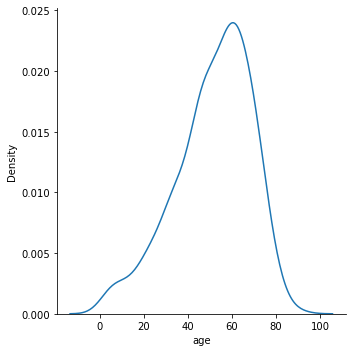

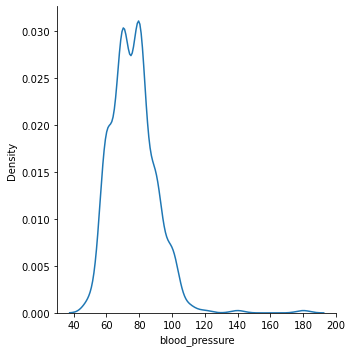

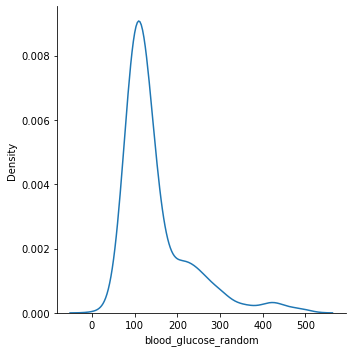

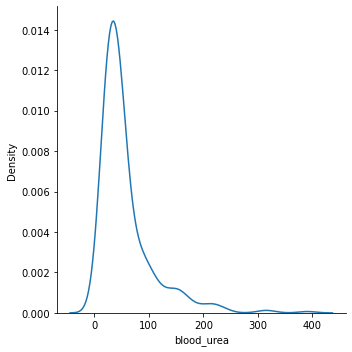

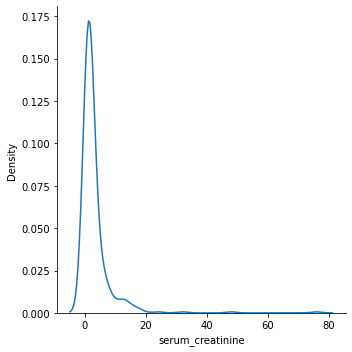

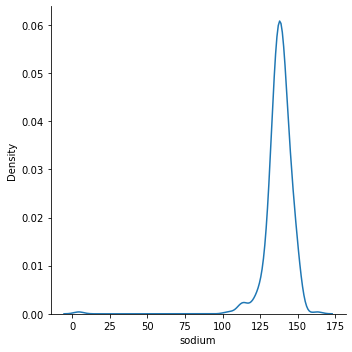

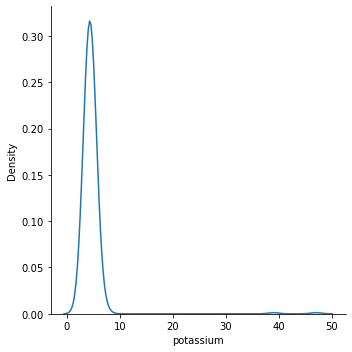

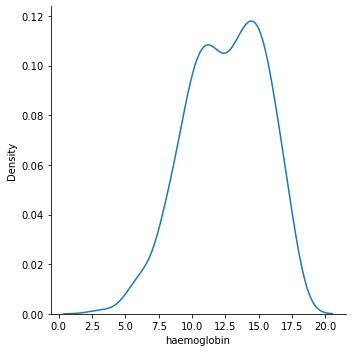

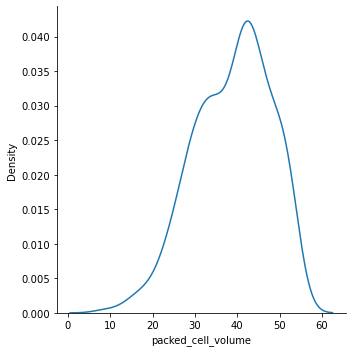

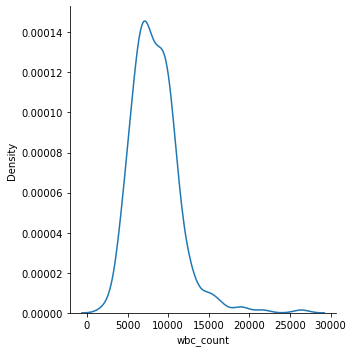

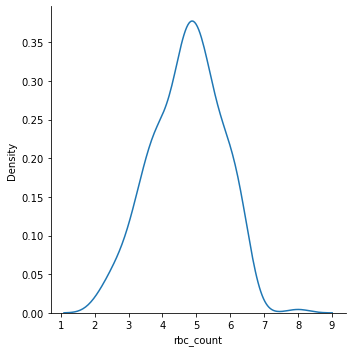

In [16]:
#creating displot for all categorical value columns
plt.figure(figsize=(20,12))
for col in num_col:
    sns.displot(df[col],kind='kde')

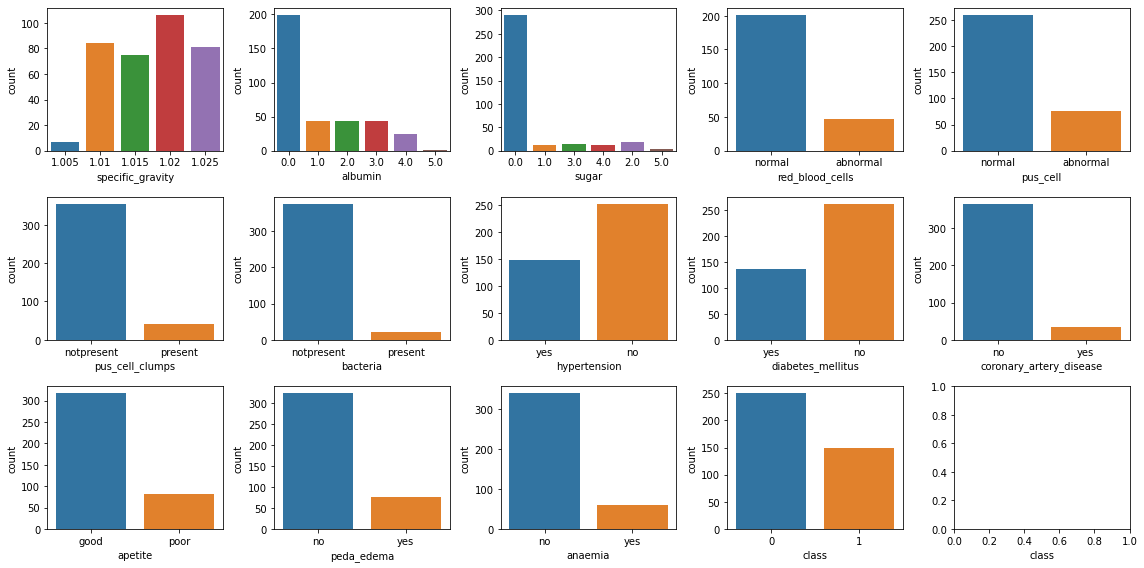

In [17]:
#creating plot for all numerical value columns
fig, axes = plt.subplots(3, 5, figsize=(16,8))
axes = axes.ravel()
for col, ax in zip(cat_col, axes):
    sns.countplot(data=df, x=col,ax=ax)
    plt.xlabel(col)
    fig.tight_layout()


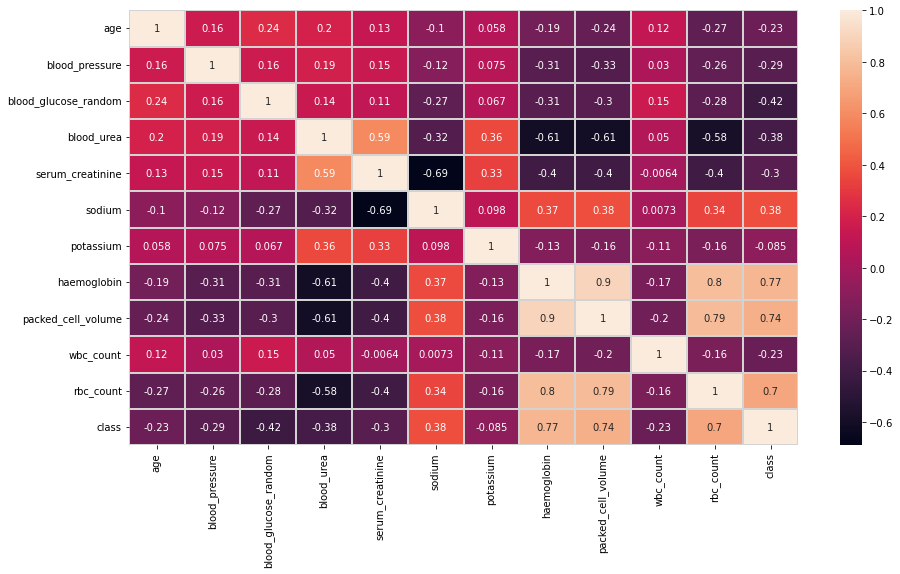

In [18]:
##creating heatmaps to find correlation between columns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidths=2,linecolor='lightgrey')
plt.show()

In [19]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
rbc_count                  131
wbc_count                  106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
apetite                      1
peda_edema                   1
anaemia                      1
class                        0
dtype: int64

In [20]:
#checking for nullvalues numeric columns
df[num_col].isna().sum().sort_values(ascending=False)

rbc_count               131
wbc_count               106
potassium                88
sodium                   87
packed_cell_volume       71
haemoglobin              52
blood_glucose_random     44
blood_urea               19
serum_creatinine         17
blood_pressure           12
age                       9
dtype: int64

In [21]:
#checking for nullvalues categorical columns
df[cat_col].isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
sugar                       49
specific_gravity            47
albumin                     46
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
apetite                      1
peda_edema                   1
anaemia                      1
class                        0
dtype: int64

In [22]:
#defining methods to impute NaN values in each column

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index =df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] = random_sample
    
def inpute_mode(feature):
    mode =df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [23]:
for col in num_col:
    random_value_imputation(col)

In [25]:
#checking for nullvalues numeric columns
df[num_col].isna().sum().sort_values(ascending=False)

age                     0
blood_pressure          0
blood_glucose_random    0
blood_urea              0
serum_creatinine        0
sodium                  0
potassium               0
haemoglobin             0
packed_cell_volume      0
wbc_count               0
rbc_count               0
dtype: int64

In [26]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')
for col in cat_col:
    inpute_mode(col)

In [27]:
#checking for nullvalues categorical columns
df[cat_col].isna().sum().sort_values(ascending=False)

specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
apetite                    0
peda_edema                 0
anaemia                    0
class                      0
dtype: int64

In [28]:
for col in cat_col:
    print(f"{col} has {df[col].nunique()} categories\n")

specific_gravity has 5 categories

albumin has 6 categories

sugar has 6 categories

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

apetite has 2 categories

peda_edema has 2 categories

anaemia has 2 categories

class has 2 categories



In [29]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,wbc_count,rbc_count,hypertension,diabetes_mellitus,coronary_artery_disease,apetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,107.0,...,38.0,6000.0,5.7,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.6,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col[3:]:
    df[col]=le.fit_transform(df[col])

In [31]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,wbc_count,rbc_count,hypertension,diabetes_mellitus,coronary_artery_disease,apetite,peda_edema,anaemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,107.0,...,38.0,6000.0,5.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [32]:
#split data into x and y

x =df.drop('class' ,axis=1)
y =df['class']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state =0)

In [36]:
#knn model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_accuracy = accuracy_score(y_test, knn.predict(x_test))
print(f"accuracy score is {knn_accuracy}\n")

print(f"confusion matrix :\n{confusion_matrix(y_test, knn.predict(x_test))}\n")     
print(f"classification report :\n{classification_report(y_test, knn.predict(x_test))}")  

accuracy score is 0.6916666666666667

confusion matrix :
[[50 22]
 [15 33]]

classification report :
              precision    recall  f1-score   support

           0       0.77      0.69      0.73        72
           1       0.60      0.69      0.64        48

    accuracy                           0.69       120
   macro avg       0.68      0.69      0.69       120
weighted avg       0.70      0.69      0.69       120



In [38]:
#decisionteeclasifier model

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

dtc_accuracy = accuracy_score(y_train, dtc.predict(x_train))
print(f"accuracy score is {dtc_accuracy}\n")

print(f"confusion matrix :\n{confusion_matrix(y_test, dtc.predict(x_test))}\n")     
print(f"classification report :\n{classification_report(y_test, dtc.predict(x_test))}")  

accuracy score is 1.0

confusion matrix :
[[71  1]
 [ 1 47]]

classification report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [39]:

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc,grid_param,n_jobs=-1, verbose=1)
grid_search_dtc.fit(x_train,y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


d:\Users\Saket\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 6000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1200 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Users\Saket\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Users\Saket\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "d:\Users\Saket\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float 

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [40]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}
0.9785714285714284


In [41]:
dtc = grid_search_dtc.best_estimator_

dtc_accuracy = accuracy_score(y_test, dtc.predict(x_test))
print(f"train accuracy score is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"test accuracy score is {dtc_accuracy}\n")

print(f"confusion matrix :\n{confusion_matrix(y_test, dtc.predict(x_test))}\n")     
print(f"classification report :\n{classification_report(y_test, dtc.predict(x_test))}")  

train accuracy score is 0.9928571428571429
test accuracy score is 0.9916666666666667

confusion matrix :
[[72  0]
 [ 1 47]]

classification report :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [42]:
#randomforestclassifier model
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth =11, max_features='auto', min_samples_leaf=2, min_samples_split=3,n_estimators=130)
rd_clf.fit(x_train, y_train)

rd_clf_accuracy = accuracy_score(y_test, rd_clf.predict(x_test))
print(f"train accuracy score is {accuracy_score(y_train, rd_clf.predict(x_train))}")
print(f"test accuracy score is {rd_clf_accuracy}\n")

print(f"confusion matrix :\n{confusion_matrix(y_test, rd_clf.predict(x_test))}\n")     
print(f"classification report :\n{classification_report(y_test, rd_clf.predict(x_test))}")  

train accuracy score is 1.0
test accuracy score is 1.0

confusion matrix :
[[72  0]
 [ 0 48]]

classification report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [43]:
#comparing accuracy score of various models
models = pd.DataFrame({
    'model' :['knn', 'decision tree classifier', 'random forest classifier'],
    'scores' :[knn_accuracy, dtc_accuracy, rd_clf_accuracy]
})

models.sort_values(by='scores', ascending=False)

,model,scores
2,random forest classifier,1.000000
1,decision tree classifier,0.991667
0,knn,0.691667
